# Autores

- Mario Fernández Simón
- Joan Sales de Marcos

# Predicción de resultados académicos

El conjunto de datos escogido para la práctica corresponde a las estadísticas de estudiantes inscritos en diversas Universidades de Portugal. Por lo tanto, cada entrada de nuestro dataset corresponderá a un estudiante en concreto.  
El objetivo será predecir cómo finalizan los estudiantes el curso al final de la carrera y clasificarlos en “dropout”, “enrolled” y “graduate”, es decir, estamos tratando un problema de clasificación.
A priori, nos encontramos con 35 variables y 1 variable objetivo de tipo categórica, la cual transformamos en numérica usando “label encoding”. El siguiente paso realizado será reducir el número de variables eliminando aquellas que no sean importantes o no guarden relación con el objetivo.


In [ ]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
from yellowbrick.target.feature_correlation import feature_correlation
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


Source: http://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
data = predict_students_dropout_and_academic_success.data.features
target = predict_students_dropout_and_academic_success.data.targets


data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


Podemos ver en la tabla de debajo que no hay variables que sean identificadores (es decir, que tengan 4424 valores únicos), así que no hay que eliminar variables por este motivo:

In [ ]:
print(data.nunique())

Marital Status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

Hemos decidido eliminar las variables categóricas con muchísimas clases (como ocupación del padre y de la madre, cualificación anterior, etc) para simplificar el problema y también porque consideramos que no es tan relevante para el problema, además de que calcular la importancia de éstas sobre los resultados es prácticamente imposible.

De primeras, hemos decidido eliminar:

- Application mode: por estar mal codificada y no explicar algunos valores
- Course: por tener tantísimos valores de clases y no explicar algunos
- Previous qualification: por tener muchas clases
- Nacionality: porque no nos parece relevante, similar al problema del Titanic
- Qualifications y trabajos del padre y madre: por tener muchísimas clases y no ser relevantes

In [ ]:
data = data.drop(columns=['Application mode', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"])

data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Admission grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
Displaced,4424.0,0.548373,0.497711,0.00,0.00,1.000000,1.000000,1.000000
Educational special needs,4424.0,0.011528,0.106760,0.00,0.00,0.000000,0.000000,1.000000
Debtor,4424.0,0.113698,0.317480,0.00,0.00,0.000000,0.000000,1.000000
Tuition fees up to date,4424.0,0.880651,0.324235,0.00,1.00,1.000000,1.000000,1.000000
Gender,4424.0,0.351718,0.477560,0.00,0.00,0.000000,1.000000,1.000000


Pese a que en la web donde se han extraído los datos pone que no hay missing values, lo comprobamos por si acaso.

In [ ]:
data.isna().sum().sort_values(ascending=False)

Marital Status                                    0
Application order                                 0
Inflation rate                                    0
Unemployment rate                                 0
Curricular units 2nd sem (without evaluations)    0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (credited)               0
Curricular units 1st sem (without evaluations)    0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (credited)               0
International                                     0
Age at enrollment                                 0
Scholarship holder                                0
Gender      

De las variables que nos quedan miraremos si son realmente relevantes para el estudio, si están correlacionadas, y si las numéricas siguen una distribución Gausiana o tienen outliers.

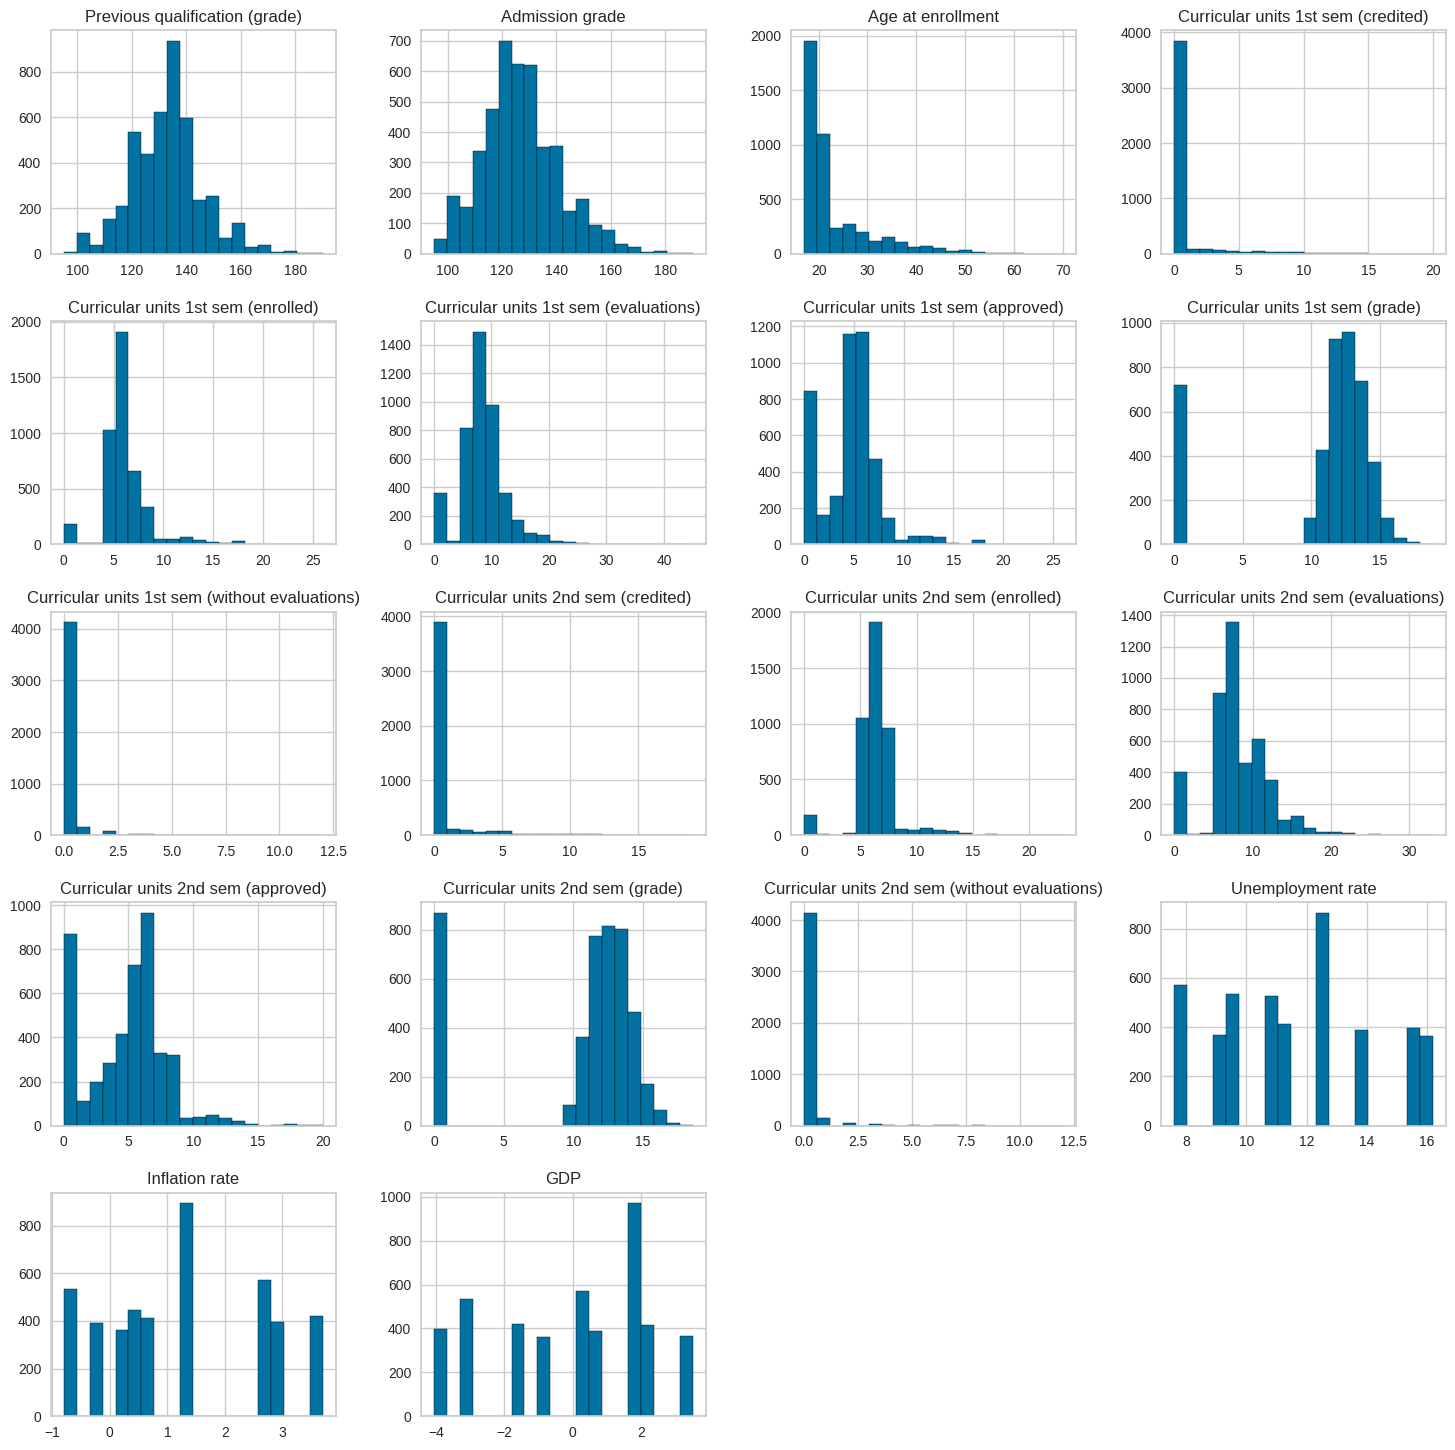

In [ ]:
data.loc[:,['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)',
            'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
            'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
            'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']].hist(bins=20, edgecolor='black', figsize=(18,18));

Se puede apreciar en los gráficos de arriba que las unidades curriculares aprobadas y sin evaluación son casi siempre de cero, por tanto no serán relevantes para el estudio y se pueden eliminar.

También se aprecia que el ratio de desempleo, inflación y GDP no son Gaussianos y que siguen un patrón más bien pseudo-aleatorio, por tanto confiamos en que se pueden eliminar.

In [ ]:
data = data.drop(columns=['Curricular units 1st sem (credited)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)'])

data = data.drop(columns=['Unemployment rate', 'Inflation rate', 'GDP'])

data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.0,1.00,1.000000,1.000000,6.000000
Application order,4424.0,1.727848,1.313793,0.0,1.00,1.000000,2.000000,9.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.0,1.00,1.000000,1.000000,1.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.0,125.00,133.100000,140.000000,190.000000
Admission grade,4424.0,126.978119,14.482001,95.0,117.90,126.100000,134.800000,190.000000
Displaced,4424.0,0.548373,0.497711,0.0,0.00,1.000000,1.000000,1.000000
Educational special needs,4424.0,0.011528,0.106760,0.0,0.00,0.000000,0.000000,1.000000
Debtor,4424.0,0.113698,0.317480,0.0,0.00,0.000000,0.000000,1.000000
Tuition fees up to date,4424.0,0.880651,0.324235,0.0,1.00,1.000000,1.000000,1.000000
Gender,4424.0,0.351718,0.477560,0.0,0.00,0.000000,1.000000,1.000000


Ahora comprobaremos las relaciones entre las variables categóricas:

<Axes: >

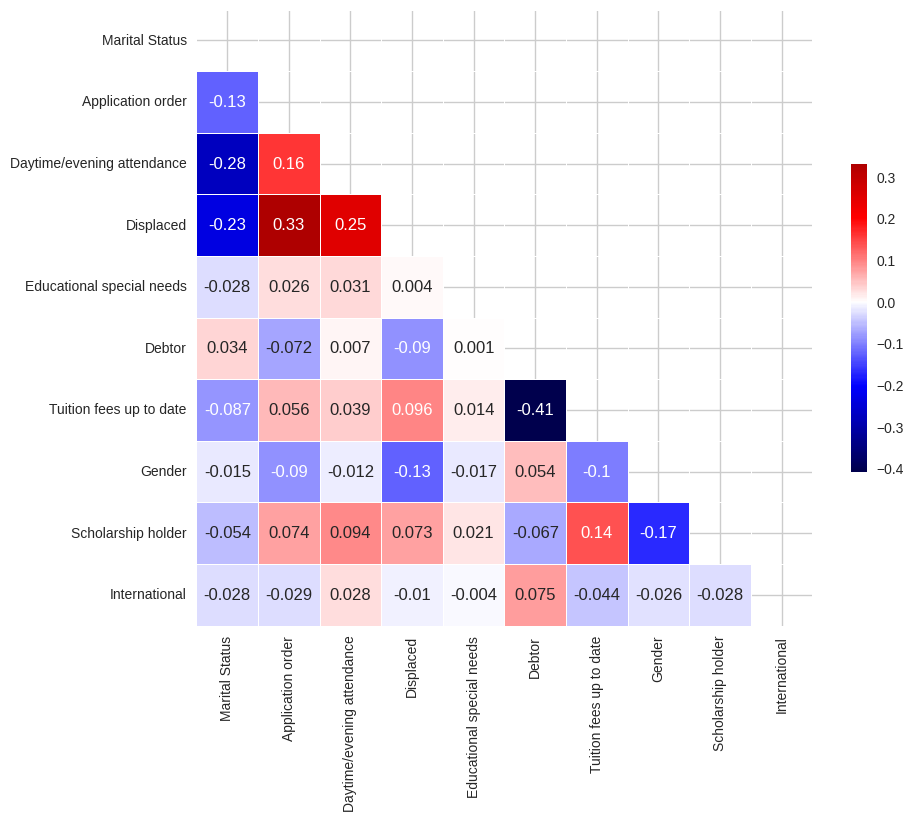

In [ ]:
categorical_vars = ['Marital Status', 'Application order', 'Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder' , 'International']
categorical_data = data[categorical_vars]

corr_categoricals = categorical_data.corr(numeric_only=True).round(3)
mask = np.triu(np.ones_like(corr_categoricals, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_categoricals, mask=mask, annot = True, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

A continuación compararemos la correlación entre todas las variables, ya que pueden haber relaciones ocultas que no hayamos pensado:


<Axes: >

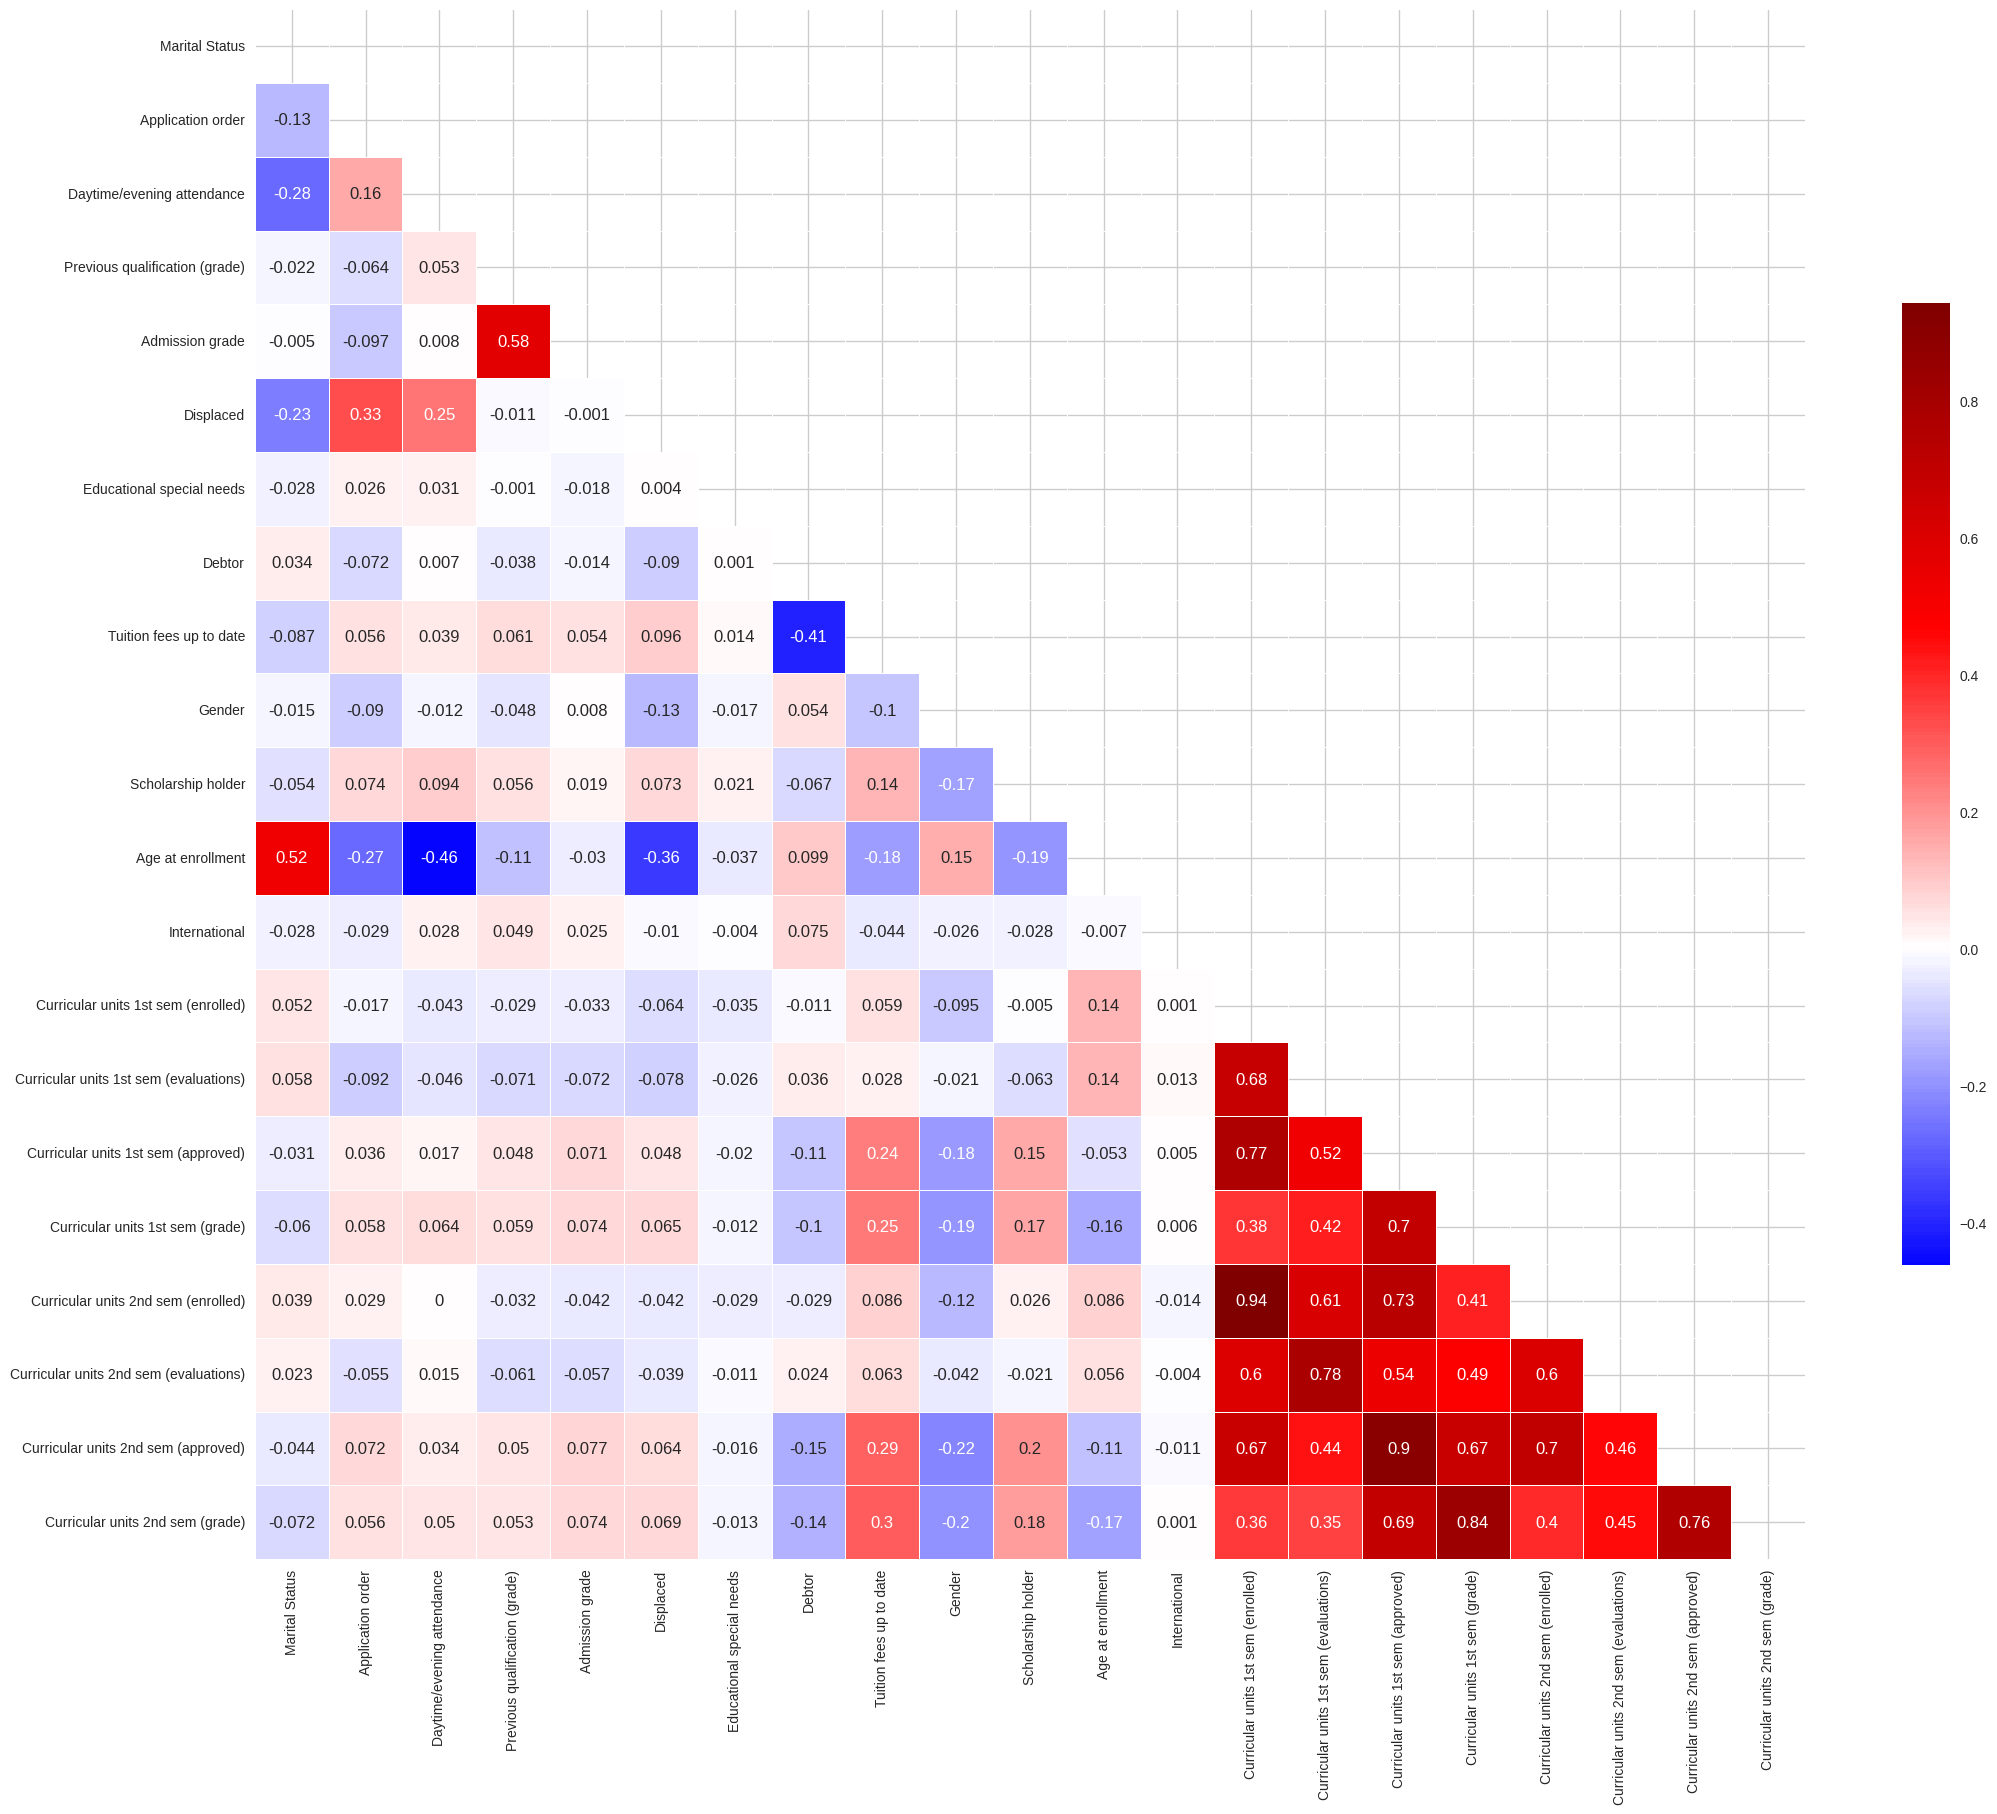

In [ ]:
corr_todas = data.corr(numeric_only=True).round(3)
mask = np.triu(np.ones_like(corr_todas, dtype=bool))
plt.subplots(figsize=(25, 25))
sns.heatmap(corr_todas, mask=mask, annot = True, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Eliminaremos international, debtor, educational especial needs y quizás en un futuro gender.

Además se puede ver trivialmente cómo los créditos matriculados y superados entre los semestres están muy fuertemente relacionados entre ellos, pero no necesariamente con el resto de variables, lo cuál es interesante.

In [ ]:
data = data.drop(columns=['International', 'Debtor', 'Educational special needs'])

data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.0,1.00,1.000000,1.000000,6.000000
Application order,4424.0,1.727848,1.313793,0.0,1.00,1.000000,2.000000,9.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.0,1.00,1.000000,1.000000,1.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.0,125.00,133.100000,140.000000,190.000000
Admission grade,4424.0,126.978119,14.482001,95.0,117.90,126.100000,134.800000,190.000000
Displaced,4424.0,0.548373,0.497711,0.0,0.00,1.000000,1.000000,1.000000
Tuition fees up to date,4424.0,0.880651,0.324235,0.0,1.00,1.000000,1.000000,1.000000
Gender,4424.0,0.351718,0.477560,0.0,0.00,0.000000,1.000000,1.000000
Scholarship holder,4424.0,0.248418,0.432144,0.0,0.00,0.000000,0.000000,1.000000
Age at enrollment,4424.0,23.265145,7.587816,17.0,19.00,20.000000,25.000000,70.000000


Comparando todas las variables con la objetivo, tenemos que:

In [ ]:
# 1: Graduate, 2: Enrolled, 3: Dropout
target_nums = target['Target'].replace({'Graduate': 2, 'Enrolled': 1, 'Dropout': 0})

data_n_target = pd.concat([data,target_nums], axis=1)

data_n_target.head()

,Marital Status,Application order,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,1,5,1,122.0,127.3,1,1,1,0,20,0,0,0,0.000000,0,0,0,0.000000,0
1,1,1,1,160.0,142.5,1,0,1,0,19,6,6,6,14.000000,6,6,6,13.666667,2
2,1,5,1,122.0,124.8,1,0,1,0,19,6,0,0,0.000000,6,0,0,0.000000,0
3,1,2,1,122.0,119.6,1,1,0,0,20,6,8,6,13.428571,6,10,5,12.400000,2
4,2,1,0,100.0,141.5,0,1,0,0,45,6,9,5,12.333333,6,6,6,13.000000,2


<Axes: >

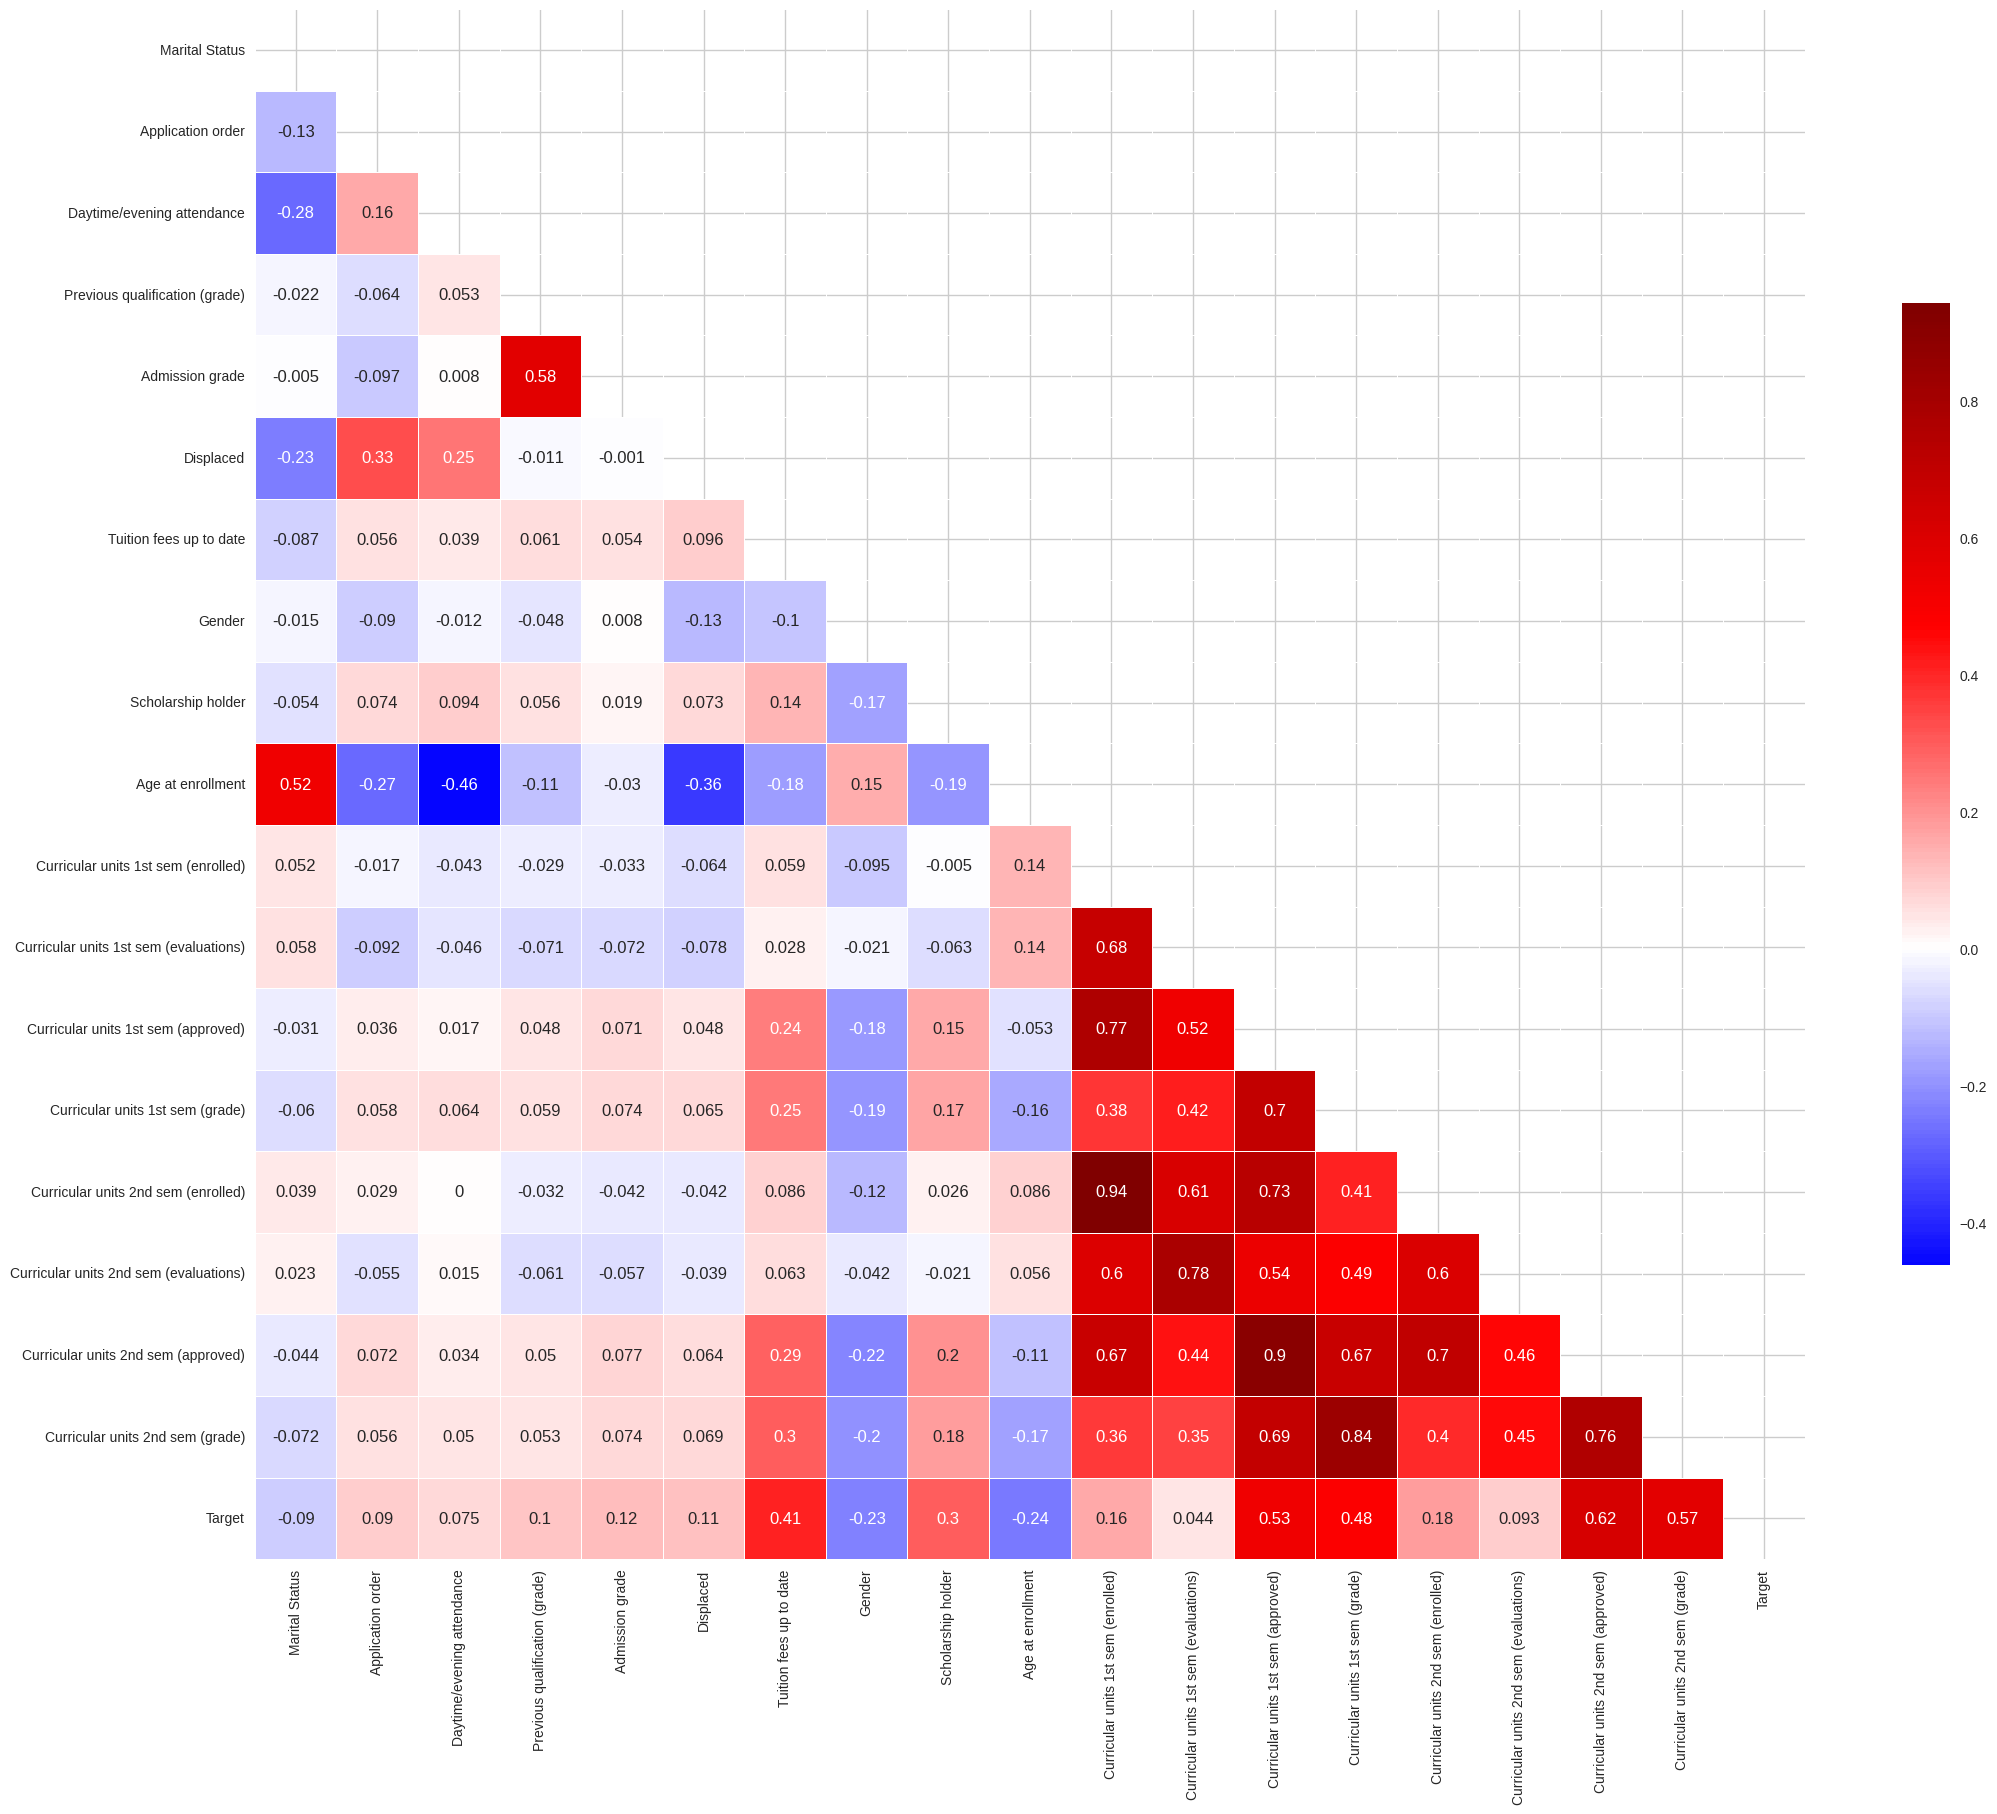

In [ ]:
corr_todas = data_n_target.corr(numeric_only=True).round(3)
mask = np.triu(np.ones_like(corr_todas, dtype=bool))
plt.subplots(figsize=(25, 25))
sns.heatmap(corr_todas, mask=mask, annot = True, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Al finalizar la limpieza de las variables nos hemos quedado con las siguientes:
- Marital Status: Estado legal matrimonial (entre 9 opciones)
- Application order: orden de aplicación (entre 0-primera opción; y 9-última opción).
- Daytime/evening attendance: 1 si va de mañanas y 0 si va por la tarde.
- Previous qualification (grade): estudios cursados anteriormente.
- Admission grade: nota de admisión (entre 0 y 200).
- Displaced: 1 si se ha mudado para ir a la universidad o 0 por el contrario.
- Tuition fees up to date: 1 si lleva las facturas al día o 0 por el contrario.
- Gender: 1-macho y 0-hembra.
- Scholarship holder: 1 dispone de beca o 0 por el contrario.
- Age at enrollment: edad al inscribirse en el curso.
- Curricular units 1st/2nd sem (enrolled): créditos cursados.
- Curricular units 1st/2nd sem (evaluations): créditos evaluados.
- Curricular units 1st/2nd sem (approved): créditos aprobados.
- Curricular units 1st/2nd sem (grade): nota obtenida.


Hacemos una regresión lineal sencilla para hacernos una idea de la veracidad y certeza de las predicciones:

In [ ]:
# Separamos datos de entreno y test
VarTrain, VarTest, ObjTrain, ObjTest = train_test_split(data, target_nums, test_size=0.2, random_state=0)

# Estandarizamos
scaler = StandardScaler()
VarsTrainSTD = scaler.fit_transform(VarTrain)
VarsTestSTD = scaler.transform(VarTest)

linealReg = LinearRegression()
linealReg.fit(VarsTrainSTD, ObjTrain)
targPredLr = linealReg.predict(VarsTrainSTD)
lrcv = np.mean(cross_val_score(linealReg, VarsTrainSTD, ObjTrain))

print(f'Cross Validation:' ,lrcv)

Cross Validation: 0.5796895755554907
